In [1]:
import pandas as pd
import random
# import xlsxwriter

In [2]:
filename = '/home/kathrin/dev_ws/csv_files/test/apriltag_data_v2.xlsx'

load_excel = False
create_excel = False

original_columns = ['time', 'frame index',
                    'trans x original', 'trans y original', 'trans z original',
                    'rot w original', 'rot x original', 'rot y original', 'rot z original']
mot_3_zscore_3_columns = ['trans x mot3z3', 'trans y mot3z3', 'trans z mot3z3', 
                          'rot x deg mot3z3', 'rot y deg mot3z3', 'rot z deg mot3z3']

if load_excel:
    try:
        df = pd.read_excel('evaluation.xlsx', sheet_name='AprilTag')
        df = df.iloc[: , 1:]
    except ValueError:
        values = [0, 0, 0, 0, 30, 0, 0, 0, 0]
        dictionary = dict(zip(original_columns, values))
        df = pd.DataFrame(data=dictionary, index=[0])
else:
    values = [0, 0, 0, 0, 30, 0, 0, 0, 0]
    dictionary = dict(zip(original_columns, values))
    df = pd.DataFrame(data=dictionary, index=[0])

all_series = list()

for i in range(100):
    values = [0, i+1, 0, 0, 30, 0, random.normalvariate(0, 4), random.normalvariate(0, 4), random.normalvariate(0.175, 4)] 
    resulting_series = [pd.Series(data=values, index=original_columns)]
    
    if not (i + 1)%3:
        values = [0, 0, 30, random.normalvariate(0, 4), random.normalvariate(0, 4), random.normalvariate(10, 4)] 
        resulting_series.append(pd.Series(data=values, index=mot_3_zscore_3_columns))
        
    all_series.append(pd.concat(resulting_series))


df = pd.concat([df, pd.concat(all_series, axis=1).T], ignore_index=True)

if create_excel:
    df.to_excel(filename, sheet_name='AprilTag')


df2 = df.iloc[2, 1:]
# df2
vals = list()
for i in ['original', 'mot3z3']:
    vals.append([df2['trans x '+i], df2['trans y '+i], df2['trans z '+i]])
# df
print(vals)
print(original_columns[2:5])
df3 = pd.DataFrame(data=vals, columns=original_columns[2:5])
df3

[[0.0, 0.0, 30.0], [nan, nan, nan]]
['trans x original', 'trans y original', 'trans z original']


,trans x original,trans y original,trans z original
0,0.0,0.0,30.0
1,NaN,NaN,NaN


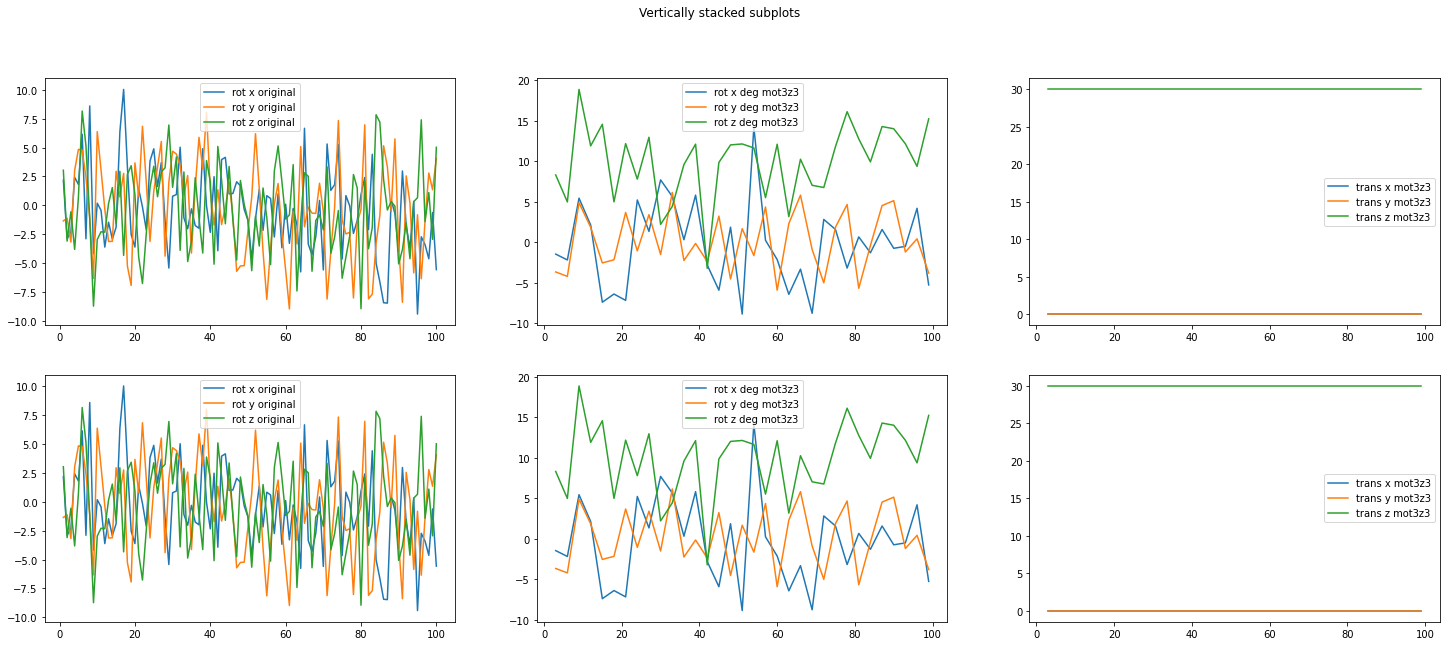

In [24]:
import matplotlib.pyplot as plt

columns2show3 = ['trans x original', 'trans y original', 'trans z original']
columns2show4 = ['trans x mot3z3', 'trans y mot3z3', 'trans z mot3z3']
columns2show = ['rot x original', 'rot y original', 'rot z original', 
                'rot x deg mot3z3', 'rot y deg mot3z3', 'rot z deg mot3z3']
columns2show = ['rot x deg mot3z3', 'rot y deg mot3z3', 'rot z deg mot3z3']

columns2show2 = ['rot x original', 'rot y original', 'rot z original']

df1 = df[columns2show2]#original_columns[2:]]
df2 = df1.loc[df['frame index'] != 0]
df4 = df[columns2show]
df3 = df4.loc[df['frame index'] != 0].dropna()
df5 = df[columns2show4]
df6 = df5.loc[df['frame index'] != 0].dropna()

# plt.figure()
# ax = df2.plot()
# df3.plot(ax=ax)

# fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(25,5))
# fig.suptitle('Vertically stacked subplots')
# df2.plot(ax=ax)
# df3.plot(ax=ax1)
# df6.plot(ax=ax2)

fig, axes = plt.subplots(2, 3, figsize=(25,10))
fig.suptitle('Vertically stacked subplots')
df2.plot(ax=axes[0,0])
df3.plot(ax=axes[0,1])
df6.plot(ax=axes[0,2])
df2.plot(ax=axes[1,0])
df3.plot(ax=axes[1,1])
df6.plot(ax=axes[1,2])

# df6.plot(ax=ax, secondary_y=True)
plt.legend(loc='best')

In [3]:
from math import pi

In [4]:
print(pi)

3.141592653589793


In [5]:
liste = ['test', 'test2', 'test3']
print(liste[:2])

['test', 'test2']


In [6]:
import pandas as pd
import random

original_columns = ['time', 'frame index',
                    'trans x original', 'trans y original', 'trans z original',
                    'rot w original', 'rot x original', 'rot y original', 'rot z original',
                    'rot x deg', 'rot y deg', 'rot z deg']
values = [0, 0, 
          0, 0, 30, 
          0, random.normalvariate(0, 3), random.normalvariate(0, 3), random.normalvariate(0.175, 3), 
          random.normalvariate(0, 3), random.normalvariate(0, 3), random.normalvariate(10, 3)] 
resulting_series = [pd.Series(data=values, index=original_columns)]
values = [0, 1, 
          0, 0, 30, 
          0, random.normalvariate(0, 3), random.normalvariate(0, 3), random.normalvariate(0.175, 3), 
          random.normalvariate(0, 3), random.normalvariate(0, 3), random.normalvariate(10, 3)] 
resulting_series += [pd.Series(data=values, index=original_columns)]
values = [0, 2, 
          0, 0, 30, 
          0, random.normalvariate(0, 3), random.normalvariate(0, 3), random.normalvariate(0.175, 3), 
          random.normalvariate(0, 3), random.normalvariate(0, 3), random.normalvariate(10, 3)] 
resulting_series += [pd.Series(data=values, index=original_columns)]

# print(resulting_series[0])

df = pd.concat(resulting_series, axis=1).T

# print(df)

df = pd.concat([df[original_columns[2:5]], df[original_columns[-3:]]], axis=1)
# print(df)

print(type(df.mean()))




<class 'pandas.core.series.Series'>


In [7]:
# filename = '/home/kathrin/dev_ws/csv_files/test/eval_data.xlsx'

# df = pd.read_excel(filename, sheet_name='NonExistent')

liste = [1, 2, 3, 4, 5]
print(liste*5)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [11]:
filename = '/home/kathrin/dev_ws/csv_files/test/multiple_sheets.xlsx'

df1 = pd.DataFrame({'Data': [11, 12, 13, 14]})
df2 = pd.DataFrame({'Data': [21, 22, 23, 24]})
df3 = pd.DataFrame({'Data': [31, 32, 33, 34]})

with pd.ExcelWriter(filename, engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet2')
    df3.to_excel(writer, sheet_name='Sheet3')
    writer.save()

In [15]:
df4 = pd.read_excel(filename, sheet_name='Sheet1').loc[1:]
with pd.ExcelWriter(filename, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:  
    df4.to_excel(writer, sheet_name='Sheet4')

In [27]:
import pandas as pd

series1 = pd.Series(data=[1, 1, 1, 1], index=['a 1', 'b 1', 'c 1', 'd 1'])
series2 = pd.Series(data=[2, 2, 2, 2], index=['a 2', 'b 2', 'c 2', 'd 2'])
series3 = pd.Series(data=[3, 3, 3, 3], index=['a 3', 'b 3', 'c 3', 'd 3'])

series = [series1, series2, series3]

df = pd.concat(series, sort=False).T
df

a 1    1
b 1    1
c 1    1
d 1    1
a 2    2
b 2    2
c 2    2
d 2    2
a 3    3
b 3    3
c 3    3
d 3    3
dtype: int64

In [1]:
import numpy as np

a = np.array([[1, 5],

              [3, 0.5]])

b = np.array([2, 4])

np.matmul(a, b)


array([22.,  8.])

In [2]:
a.transpose()

array([[1. , 3. ],
       [5. , 0.5]])

In [5]:
m = np.array([[-1.0000000e+00, -1.2246468e-16,  0.0000000e+00], 
              [ 1.2246468e-16, -1.0000000e+00,  0.0000000e+00],
              [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])
m.transpose()

array([[-1.0000000e+00,  1.2246468e-16,  0.0000000e+00],
       [-1.2246468e-16, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])